In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# MNIST VERİ SETİNİ YÜKLÜYORUZ
print("MNIST Veri Seti Yükleniyor")
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

MNIST Veri Seti Yükleniyor
11490434/11490434 [==============================] - 3s 0us/step


In [3]:
# X_train, X_val, X_test => giriş verisidir
# Y_train, Y_val, Y_test => çıkış verisidir (sonuç)

# Verileri yeniden boyutlandırıyoruz:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# Verileri normalize ediyoruz (0 ve 1 aralığına getiriyoruz:)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Verilerin toplam sayısını ve yeni boyutunu yazdırıyoruz:
print(f"Eğitim Verilerinin boyutu ve sayısı = {x_train.shape}")
print(f"Test Verilerinin boyutu ve sayısı = {x_test.shape}")

Eğitim Verilerinin boyutu ve sayısı = (60000, 28, 28, 1)
Test Verilerinin boyutu ve sayısı = (10000, 28, 28, 1)


In [4]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# [0,0,0,1,0,0,0,0,0,0]

In [5]:
# 3. Eğitim verilerini train ve validation olarak bölme
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size=0.2,  # %20'si validation için
    random_state=42,  # Tekrarlanabilirlik için
    stratify=y_train  # Sınıf dağılımını korumak için
)

print(f"Veri bölme sonrası boyutlar:")
print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Validation verisi boyutu: {X_val.shape}")

Veri bölme sonrası boyutlar:
Eğitim verisi boyutu: (48000, 28, 28, 1)
Validation verisi boyutu: (12000, 28, 28, 1)


In [6]:
# Modelimizi oluşturuyoruz:

model = keras.Sequential([
    # İlk Convolution Bloku
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # İkinci Convolution Bloku
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # Yapay Sinir Ağı'na bağlıyoruz
    # Önce görüntü matrislerini birer vektör haline getiriyoruz
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'two_blocks_cnn_for_mnist_dataset.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max', verbose = 1)

In [12]:

history = model.fit(X_train,y_train_split,validation_data=(X_val,y_val),
     batch_size=128, epochs=5, callbacks=model_checkpoint,
     verbose=1)

Epoch 1/5
375/375 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9896
Epoch 1: val_accuracy improved from 0.99083 to 0.99167, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 84s 225ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 2/5
375/375 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9905
Epoch 2: val_accuracy improved from 0.99167 to 0.99208, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 88s 236ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0270 - val_accuracy: 0.9921
Epoch 3/5
375/375 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9915
Epoch 3: val_accuracy did not improve from 0.99208
375/375 [==============================] - 89s 236ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0273 - val_accuracy: 0.9918
Epoch 4/5
375/375 [===========================

In [13]:
#MNIST_Classification_with_CNN

#two_blocks_CNN_model_for_MNIST

In [15]:
print("Test verisi üzerinde model değerlendirmesi başlıyor...")
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"modelin hata oranı = {test_loss}")
print(f"modelin doğruluk oranı = {test_accuracy}")

Test verisi üzerinde model değerlendirmesi başlıyor...
313/313 [==============================] - 5s 15ms/step - loss: 0.0177 - accuracy: 0.9944
modelin hata oranı = 0.017694421112537384
modelin doğruluk oranı = 0.9944000244140625


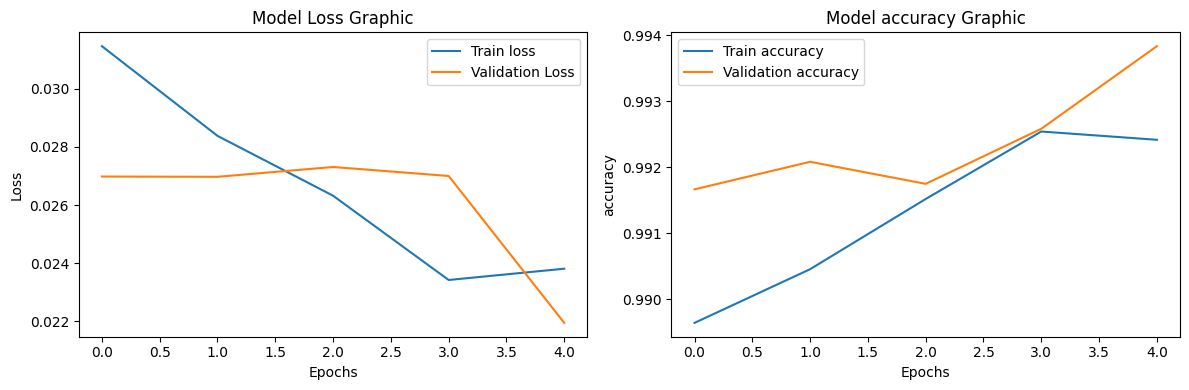

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Model Loss Graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.title("Model accuracy Graphic")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred,axis=1)
y_test_classes = np.argmax(y_test,axis=1)



313/313 [==============================] - 4s 13ms/step


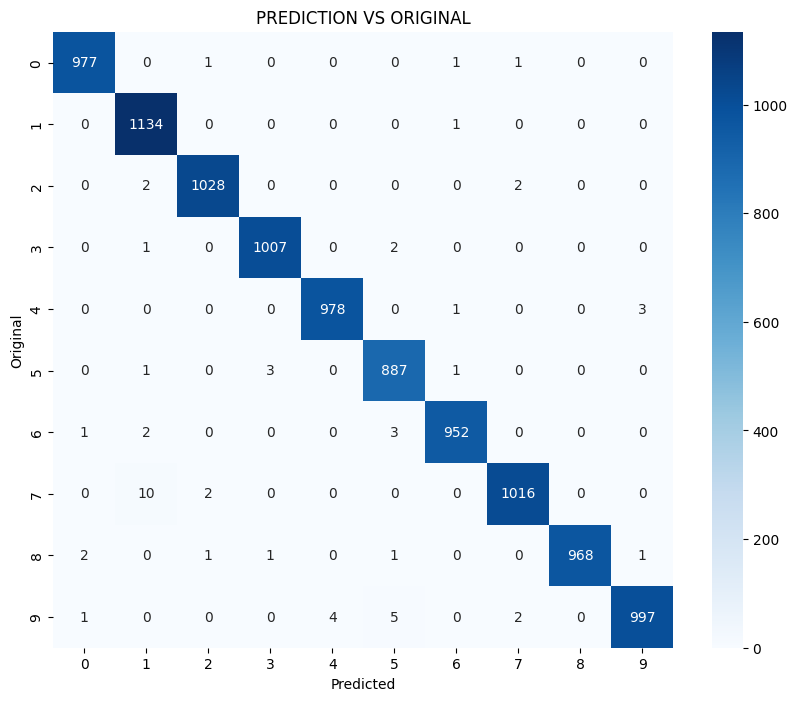

In [23]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, fmt='d', annot=True, cmap="Blues")
plt.title("PREDICTION VS ORIGINAL")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()